# GRIP - MAY 2021
## Data Science and Business Analytics
## Nair Sidharth Shankaranarayanan
### Task 6 -- Prediction using Decision Tree Algorithm

Install required Libraries

In [10]:
!pip install pydotplus
!pip install graphviz

Set GraphViz to path

In [11]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

Import required Libraries

In [12]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Load Dataset

In [13]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
print('Feature names:', dataset.feature_names, 'Size:', dataset.data.shape)
print('Target names:', dataset.target_names, 'Size:', dataset.target.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] Size: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica'] Size: (150,)


Split the dataset into testing and training models

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=0)
print('Train Sizes:', X_train.shape, y_train.shape)
print('Test Sizes:', X_test.shape, y_test.shape)

Train Sizes: (105, 4) (105,)
Test Sizes: (45, 4) (45,)


Fit the models into decision tree classifier

In [15]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Predict y

In [16]:
y_predict = decision_tree.predict(X_test)
print('Actual values:', y_test)
print('Predicted values:', y_predict)

Actual values: [2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2]
Predicted values: [2 2 0 0 1 0 1 1 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 1 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2]


Visualize the Decision Tree

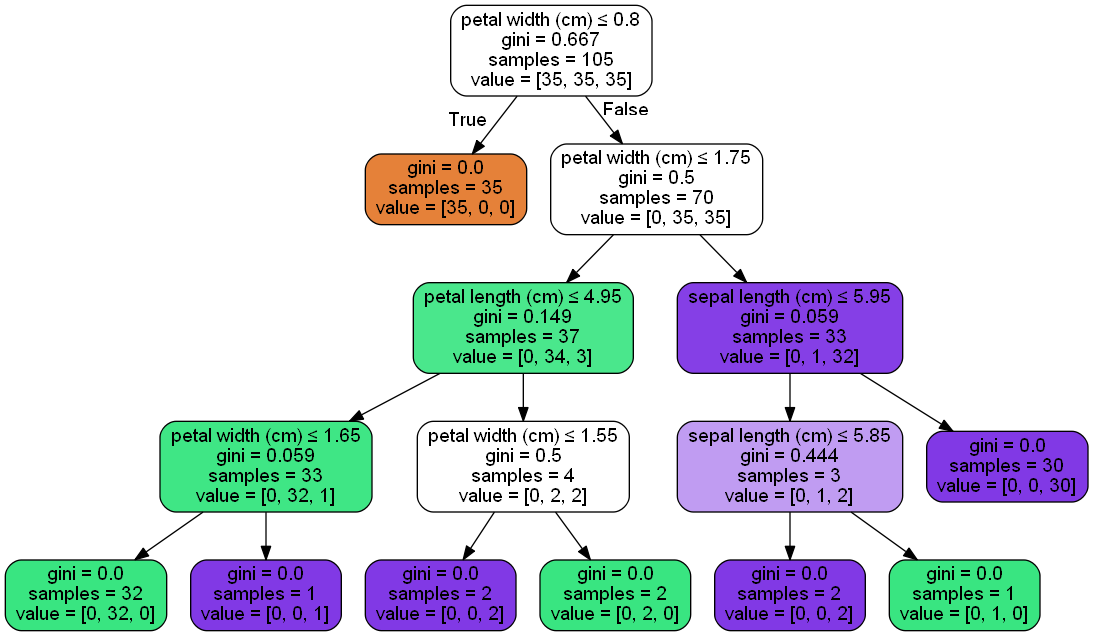

In [17]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names=dataset.feature_names, filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Check accuracy, confusion matrix and report

In [18]:
print('Training Dataset Accuracy: %f' % decision_tree.score(X_train, y_train))
print('Testing Dataset Accuracy: %f' % decision_tree.score(X_test, y_test))

print('Confusion Matrix:', confusion_matrix(y_test, y_predict), sep='\n')
print('Report:', classification_report(y_test, y_predict), sep='\n')

Training Dataset Accuracy: 1.000000
Testing Dataset Accuracy: 0.955556
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

